***README:*** Potrebno instalirati ffmpeg paket naredbom: conda install -c conda-forge ffmpeg
Paket koristim za prikaz animacija.

   # Prvi esej - Prosti brojevi

In [81]:
#importamo sve potrebno za biljeznicu
import numpy as np    
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colorbar as cbar
from matplotlib.animation import FuncAnimation
from IPython import display
import collections
import math
import sympy as sp
import pandas as pd
plt.rcParams['figure.max_open_warning'] = 50
%matplotlib agg

**Prosti brojevi** ili **prim-brojevi** su prirodni brojevi, strogo veći od broja 1, koji su djeljivi bez ostatka samo sa samim sobom i s brojem 1. <br>
Drugim riječima, prosti brojevi su prirodni brojevi veći od 1 koji se ne mogu dobiti umnoškom dva manja prirodna broja. <br>
Prirodni brojevi koji nisu prosti, a veći su od 1, nazivaju se *složenim brojevima*.

In [124]:
#prvo generirajmo sve proste brojeve do 100
prosti = 2 + np.arange(99) #brojevi 2....100
#sve brojeve koji nisu prosti postavljamo na 0
#od parnih brojeva nam treba samo 2
prosti[2:100:2] = 0
#preostaje još izbaciti višekratnike brojeva 3, 5, 7, 11 
prosti[4:100:3] = 0
prosti[8:100:5] = 0
prosti[12:100:7] = 0
prosti[20:100:11] = 0

#izbrojmo koliko ima nula
n = np.count_nonzero(prosti)

#pretvorimo array u list kako bi mogli izbaciti nule
prosti = prosti.tolist()
for i in range(0, 99 - n):
    prosti.remove(0)

fig, ax = plt.subplots( figsize=(10,2) ) #povecamo prikaz
fig.patch.set_visible(False)
ax.axis('off') 

#animacija

lines = plt.plot([])
line = lines[0]

plt.xlim(0, 100)
plt.ylim(-5, 5)

#crtamo pravac
plt.plot([0,100],[0,0], color = 'black')
ax.set_title("Prosti brojevi do 100")

#na pravcu točkama označava proste brojeve i ispisuje njihove vrijednosti
def animate(frame):
    plt.plot(prosti[frame], 0, color = 'pink', marker = 'o')
    ax.annotate( prosti[frame], (prosti[frame] - 0.5, -2), fontsize=8)
    
anim = FuncAnimation( fig, animate, frames = n, interval = 300 )

#konvertiramo u video
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
#da ne nacrta i staticnu sliku
plt.close()

Svi smo se barem jednom u životu zapitali zašto se broj 1 ne smatra prostim brojem. Vidimo da zadovoljava sve uvjete (naravno, osim onoga da je veći od 1): 
* $1 \in \mathbb{N} $  
* 1 je djeljiv s 1 i sa samim sobom <br>

Zašto onda 1 nije prosti broj? <br>
Odgovor na ovo pitanje nam daje *osnovni teorem aritmetike*.

**Osnovni teorem aritmetike** <br>
*Svaki prirodan broj $n \gt 1$ je ili prost ili se može prikazati u obliku produkta prostih brojeva i taj prikaz je jedinstven, do na poredak faktora.*

Kada bi 1 bio prost broj, onda bismo mogli pisati: $2 = 2 \times 1 = 2 \times 1 \times 1 =  ...$ . Dakle, prikaz broja u obliku produkta prostih brojeva ne bi bio jedinstven. Ovo je jedan od glavnih razloga zbog čega 1 ne smatramo prostim brojem.

Sada ćemo vizualno prikazati prvih 12 prirodnih brojeva pomoću točkica. S lijeve strane se nalaze prosti brojevi, a s desne složeni. 

In [126]:
#pomoćna funkcija za crtanje
def prost(n: int):
    if n < 2 or isinstance( n, int ) == False:
        return False
    for i in range( 2, math.floor( n** 2** -1 ) + 1 ):
        if n % i == 0:
            return False
    return True

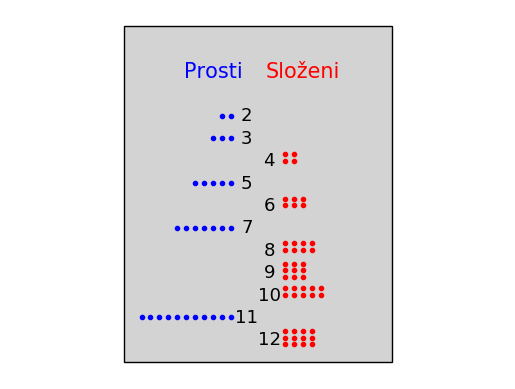

In [128]:
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable = 'datalim' ) #postavljamo isto skaliranje za os x i y
fig.patch.set_visible(False)
ax.axis('off')

#crtamo pravokutnik
rect = patches.Rectangle( (-1, -4), 12, 15, ec = 'black', fc = '#D3D3D3' )
ax.add_patch( rect )
ax.annotate( 'Prosti' , ( 3, 9 ), fontsize = 15, ha='center', va = 'center', color = 'blue' )
ax.annotate( 'Složeni' , ( 7, 9 ), fontsize = 15, ha='center', va = 'center', color = 'red' )

#crtanje tockica
for i in range( 2, 13 ):
    n = 9
    if prost( i ):
        ax.annotate( i , ( 4.5 , n - i ), fontsize = 13, ha='center', va = 'center')
        for j in range( 0, i ):
            ax.plot([3.8-j*0.4 ], [n-i], color = 'blue', marker = 'o', markersize = 3 )
    else:
        ax.annotate( i , ( 5.5 , n - i ), fontsize = 13, ha='center', va = 'center')
        if i == 4 or i == 6 or i == 8 or i == 10:
            for j in range( 0, 2 ):
                for k in range( 0, i // 2 ):
                    ax.plot([6.2+0.4*k ], [n-i+j*0.3], color = 'red', marker = 'o', markersize = 3 )
        if i == 9 or i == 12:
            for j in range( 0, 3 ):
                for k in range( 0, i // 3 ):
                    ax.plot([6.2+0.4*k ], [n-i+j*0.3 - 0.2], color = 'red', marker = 'o', markersize = 3 )
        
fig

Vidimo da su kod prostih brojeva sve točkice u jednom redu, dok ih kod složenih možemo podijeliti u više redova iste veličine, odnosno možemo ih na neki način faktorizirati. Pogledajmo npr. broj 12 sa slike. Imamo 12 točkica raspoređenih u 3 retka i 4 stupca. Dakle, $12 = 3 \times 4$, ali to smo mogli zapisati i kao $12 = 2 \times 2 \times 3$. Nas će zanimati ovaj drugi način. Upravo tome nam prosti brojevi služe, tj. koristimo ih pri rastavljanju složenih brojeva na proste ili **prim-faktore**. Kasnije ćemo se upoznati s nekoliko metoda faktorizacije složenog broja.

Prosti brojevi su odavno predmet promatranja brojnih matematičara. Iako je prvi pisani dokaz o prostim brojevima iz 1550. pr. Kr., tek su drevni grci pručavali njihova svojstva. Euklid je bio pionir proučavanja prostih brojeva te je oko 300. pr. Kr. dokazao da ih ima beskonačno mnogo.

**Euklidov teorem**<br>
*Skup svih prostih brojeva je beskonačan, tj. ne postoji najveći prosti broj.*

Dokaz *Euklidovog teorema* temelji se na kontradikciji, tj. pretpostavci da je skup prostih brojeva konačan i konstrukciji broja koji se ne može prikazati kao produkt tih prostih brojeva. Tako dolazimo do kontradikcije s Osnovnim teoremom aritmetike.
Napisat ćemo funkciju koja prima prosti broj $p$ za kojeg pretpostavljamo da je najveći prosti broj i konstruira broj koji nije prikaziv pomoću prostih brojeva manjih ili jednakih $p$.

In [4]:
def Euklid(p: int):
    if prost( p ):
        novi_prosti = 1
        for i in range( 2, p + 1 ):
            if prost( i ):
                novi_prosti *= i
        novi_prosti += 1
    else:
        return False
    return novi_prosti

In [5]:
Euklid(5)

31

Vidimo da ako uzmemo za skup prostih brojeva skup $ P = \{2, 3, 5\}$, prema dokazu Euklidovog teorema konstruiramo broj 31, koji je prost. Dakle, u skupu P se ne nalaze svi prosti brojevi.<br>
Ali ako unesemo broj 37, dobijemo broj 7420738134811 koji nije prost, no ne može se prikazati pomoću prostih brojeva manjih ili jednakih 37. Korištenjem metode faktorizacije *probno dijeljenje* koju ćemo obraditi kasnije, dobijemo sljedeći rastav broja na proste faktore: $7420738134811 = 181 \times  60611 \times 676421$. Vidimo da na ovaj način zapravo možemo pronaći neke proste brojeve veće od zadanog broja.

In [6]:
Euklid(37)

7420738134811

Postoji i varijanta dokaza koja koristi $n!$. Naime, $n! = 1 \times 2 \times 3 \times ... \times (n-1) \times n$ je djeljiv svakim prirodnim brojem od 2 do $n$, stoga broj $n! + 1$ nije djeljiv nijednim brojem od 2 do $n$. Dakle, broj $n!+1$ je ili prost ili je djeljiv nekim prostim brojem koji je veći od $n$.

### $\pi(x)$ - Broj prostih brojeva manjih ili jednakih x

Odavno se postavlja pitanje koliko prostih brojeva ima manjih ili jednakih od nekog zadanog broja $x$. Mnogi matematičari su se bavili tim ptoblemom i ispisivali sve proste brojeve manje od nekog broja (jednog od njih ćemo spomeniti kasnije). Pogledajmo funkciju koja opisuje koliko ima prostih brojeva manjih ili jednakih $x$.

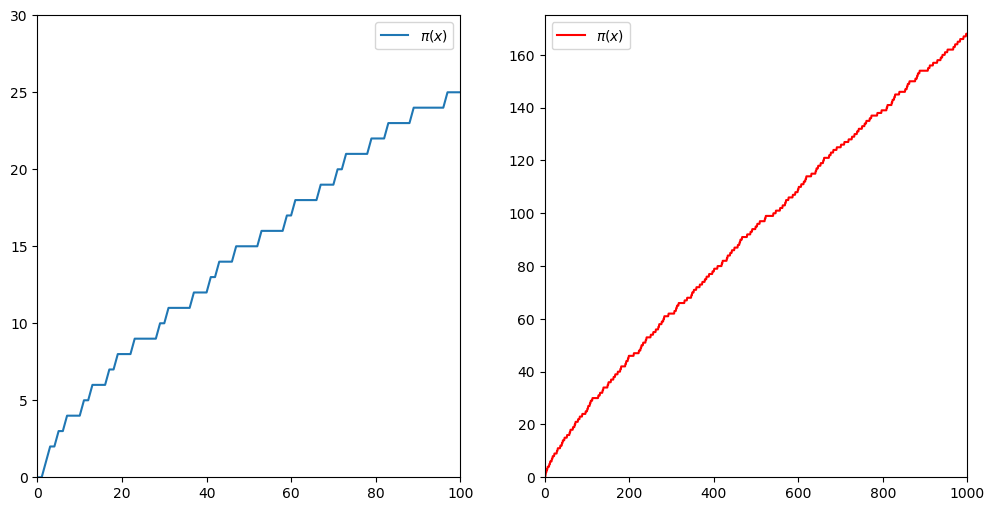

In [129]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
#ax1.set_aspect('equal', adjustable = 'datalim' ) #postavljamo isto skaliranje za os x i y
#ax2.set_aspect('equal', adjustable = 'datalim' ) 
ax1.set( xlim=(0,100), ylim=(0,30) )
ax2.set( xlim=(0,1000), ylim=(0,175) )

x = np.arange(101)
y = []
for i in range (0,101):
    y.append(sp.primepi(x[i]))
    
ax1.plot(x, y, label = '$\pi(x)$')
ax1.legend(loc = 'best')

x = np.arange(1001)
y = []
for i in range (0,1001):
    y.append(sp.primepi(x[i]))
    
ax2.plot(x, y, label = '$\pi(x)$', color='red')
ax2.legend(loc = 'best')

fig

Vidimo da je graf za male x-eve jako iregularan (graf lijevo), ali kada pogledamo graf za x-eve do 1000 možemo ipak uočiti nekakav uzorak. Promotrimo sljedeću tablicu:

In [91]:
df = pd.DataFrame([[1000, 168, 145, 169], 
                   [10000, 1229, 1086, 1218],
                   [100000, 9592, 8686, 9512],
                   [1000000, 78498, 72382, 78030],
                   [10000000, 664579, 620420, 661459],
                   [100000000, 5761455, 5428681, 5740304]],
            columns=['$x$', '$\pi(x)$', '$x/ln(x)$', '$x/ln(x-1)$'])
df

,$x$,$\pi(x)$,$x/ln(x)$,$x/ln(x-1)$
0,1000,168,145,169
1,10000,1229,1086,1218
2,100000,9592,8686,9512
3,1000000,78498,72382,78030
4,10000000,664579,620420,661459
5,100000000,5761455,5428681,5740304


C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide


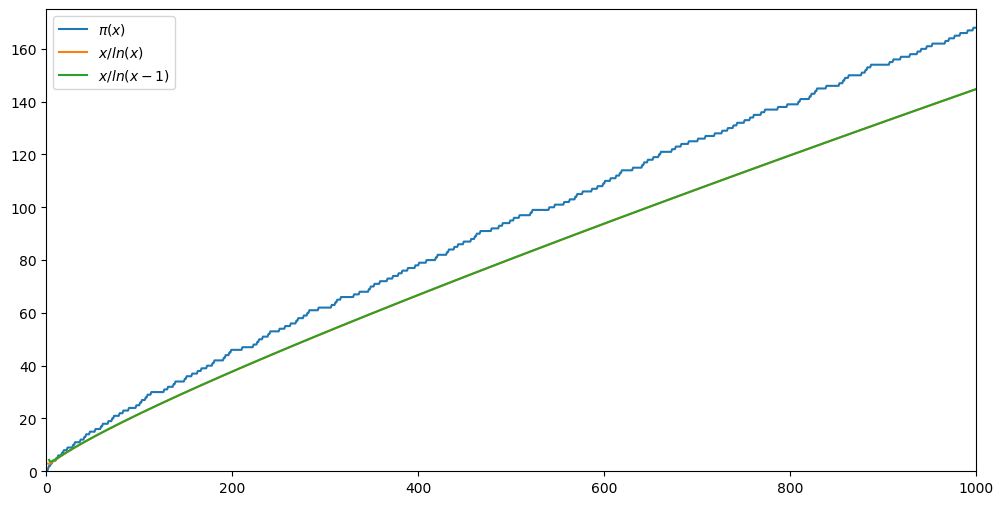

In [123]:
fig, ax = plt.subplots(figsize=(12,6))

ax.set( xlim=(0,1000), ylim=(0,175) )

x = np.arange(1001)
tocke = np.linspace(0, 10001)
x1 = x[1:]
x2 = x[2:]

y = []
y1 = []
y2 = []

for i in range (0,999):
    y.append(sp.primepi(x[i]))
    y1.append(math.log(x1[i]))
    y2.append(math.log(x2[i] - 1))
    
y.append(sp.primepi(x[999]))
y.append(sp.primepi(x[1000]))
y1.append(math.log(x1[999]))

ax.plot(x, y, label = '$\pi(x)$')
ax.plot(x1, x1/y1, label = '$x/ln(x)$')
ax.plot(x2, x2/y2, label = '$x/ln(x-1)$')

ax.legend(loc = 'best')

fig

Iz tablice vidimo da je funkcia $x/ln(x-1)$ bolja aproksimacija funkcije $\pi(x)$ od $x/ln(x)$, ali za male x-eve (ipod 1000) vidimo na grafu da nema prevelike razlike između te dvije funkcije.

Poznati matematičar koji je proučavao proste brojeve i bavio se ovim problemom bio je *Eratosten*. On je osmislio jednostavan algoritam za pronalaženje svih prostih brojeva manjih od nekog broja. Algoritam je poznat pod nazivom *Eratostenovo sito (rešeto)*.

### Eratostenovo sito

**Algoritam:**<br>
1. napišemo sve prirodne brojeve manje od zadanog broja, počevši od 2
2. zaokružimo najmanji neoznačeni broj
3. precrtamo sve njegove višekratnike, koji već nisu precrtani
4. ponavljamo korake 2. i 3. dok svi brojevi nisu ili zaokruženi ili precrtani

Brojevi koji su zaokruženi su svi prosti brojevi manji od zadanog.<br>
Ilustrirajmo algoritam na brojevima do 120.

In [10]:
#napravimo vektor svih vrijednosti od 0 do 120
brojevi = 1 + np.arange(120)
brojevi.resize(12,10)

#za svaki broj zapisimo x koordinatu pravokutnika
x = np.arange(10)
x.resize(1,10)
x = x.repeat(12, axis=0)

#y koordinate
y = np.arange(11, -1, -1)
y = y.repeat(10)
y.resize(12,10)

#višekratnik od 2, 3, 5, 7
visekratnik_od = np.ones(brojevi.shape)
for i in range(0, 12):
    for j in range(0, 10):
        for k in 2, 3, 5, 7:
            if visekratnik_od[i, j] == 1:
                if brojevi[i, j] % k == 0:
                    visekratnik_od[i, j] = k
visekratnik_od[0, 0] = 0

#broj visekratnika
br_2 = np.count_nonzero( visekratnik_od == 2 )
br_3 = np.count_nonzero( visekratnik_od == 3 ) + br_2
br_5 = np.count_nonzero( visekratnik_od == 5 ) + br_3
br_7 = np.count_nonzero( visekratnik_od == 7 ) + br_5

#boje za proste brojeve
colors = np.random.rand(27)
normal = plt.Normalize(0,1) 
cmap = plt.cm.PuRd
c = cmap(colors)

#animacija
fig = plt.figure()
ax = plt.subplot()

ax.set_aspect('equal', adjustable = 'datalim' )
fig.patch.set_visible(False)
ax.axis('off')

lines = plt.plot([])
line = lines[0]

plt.xlim(-0.5, 10.5)
plt.ylim(-0.5, 12.5)
ax.set_title( 'Eratostenovo sito' )

#nacrtajmo tablicu
for i in range(0, 12):
    for j in range(0, 10):
        rect = patches.Rectangle( ( x[i, j], y[i, j] ), 1, 1, ec = 'black', fc = 'white' )
        ax.add_patch( rect )
        if i != 0 or j != 0:
            cx = x[i, j] + rect.get_width()/2
            cy = y[i, j] + rect.get_height()/2
            ax.annotate( brojevi[i, j] , ( cx, cy ), fontsize = 10, ha='center', va = 'center' ) 
            

#trebat ce nam za bojanje svakog broja po jedan frame:
#ovo racunamo pomocu np.count_nonzero()
#za broj 2: 60 frameova
#za broj 3: 20 frameova
#za broj 5: 8 frameova
#za broj 7: 5 frameova
#za ostale proste: 27
def animate(frame):
    istina = 0
    for i in range(0, 12):
        for j in range(0, 10):
            if frame < br_2 and visekratnik_od[i, j] == 2:
                if brojevi[i, j] == 2:
                    rect = patches.Rectangle( ( x[i, j] , y[i, j] ), 1, 1, ec = 'black', fc = 'firebrick' )
                else:
                    rect = patches.Rectangle( ( x[i, j] , y[i, j] ), 1, 1, ec = 'black', fc = 'salmon' )
                istina = 1
            elif frame >= br_2 and frame < br_3 and visekratnik_od[i, j] == 3:
                if brojevi[i, j] == 3:
                    rect = patches.Rectangle( ( x[i, j] , y[i, j] ), 1, 1, ec = 'black', fc = 'steelblue' )
                else:
                    rect = patches.Rectangle( ( x[i, j] , y[i, j] ), 1, 1, ec = 'black', fc = 'deepskyblue' )
                istina = 1
            elif frame >= br_3 and frame < br_5 and visekratnik_od[i, j] == 5:
                if brojevi[i, j] == 5:
                    rect = patches.Rectangle( ( x[i, j] , y[i, j] ), 1, 1, ec = 'black', fc = 'gold' )
                else:
                    rect = patches.Rectangle( ( x[i, j] , y[i, j] ), 1, 1, ec = 'black', fc = 'khaki' )
                istina = 1
            elif frame >= br_5 and frame < br_7 and visekratnik_od[i, j] == 7:
                if brojevi[i, j] == 7:
                    rect = patches.Rectangle( ( x[i, j] , y[i, j] ), 1, 1, ec = 'black', fc = 'limegreen' )
                else:
                    rect = patches.Rectangle( ( x[i, j] , y[i, j] ), 1, 1, ec = 'black', fc = 'springgreen' )
                istina = 1
            elif frame >= br_7 and visekratnik_od[i, j] == 1:
                rect = patches.Rectangle( ( x[i, j] , y[i, j] ), 1, 1, ec = 'black', fc = c[120 - frame - 1] )
                istina = 1
            if istina:
                ax.add_patch( rect )
                visekratnik_od[i, j] = 0
                break
        if istina == 1:
            break
        
anim = FuncAnimation( fig, animate, frames = 120, interval = 100 )

#prebacujemo u video format
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
#da ne nacrta i staticnu sliku
plt.close()

Prvo smo napisali sve prirodne brojeve od 2 do 120. U svakom koraku je najmanji neoznačeni broj prost broj. Prvi najmanji neoznačeni broj je 2 pa njega označimo ("zaokružimo") tamnocrvenom bojom, a zatim sve njegove višekratnike "precrtamo" svjetlijom nijansom crvene boje. Sada je najmanji neoznačeni broj broj 3. Označimo ga tamnijom plavom bojom, a njegove višekratnike (koji već nisu označeni) svjetlijom plavom bojom. Postupak ponovimo za brojeve 5 (žuta boja) i 7 (zelena boja). Sljedeći neoznačeni broj je 11, no sve njegove višekratnike smo već "precrtali". Ostali su nam samo prosti brojevi koje smo označili random nijansama ljubičaste boje.
Algoritam završava u konačno mnogo koraka jer imamo konačno mnogo brojeva.

## Metode faktorizacije

### Pokusno dijeljenje

Jedna od najjednostavnijih, ali zato i najsporijih metoda za faktorizaciju broja je obično *dijeljenje*. Kako bi faktorizirali prirodan broj $n$, provjeravamo s kojim brojevima manjim od $n$ je djeljiv, osim s 1. Provjeru započinjemo od broja 2 prema broju $n$ jer je veća vjerojatnost da bude djeljiv s 2, nego s 3, s 3, nego s 4, itd. Dovoljno je provjeriti je li $n$ djeljiv nekim brojem manjim ili jednakim $\sqrt{n}$. Naime, ako je $n$ djeljiv nekim brojem a, onda je $n = a \times b $ pa kad bi bilo $b \lt a$ već bismo otkrili da je $n$ djeljiv s a ili nekim prostim faktorom od a. Dakle, zapravo provjeravamo je li $n$ višekratnik nekog prirodnog broja između $2$ i $\sqrt{n}$. Nadalje, ako 2 ne dijeli $n$, onda niti jedan broj oblika $2m$ ne dijeli $n$, itd. pa ako broj nije djeljiv s $m$, onda ne trebamo provjeravati je li djeljiv s višekratnicima broja $m$. Dakle, provjeru možemo smanjiti tako da kao kandidate za faktore uzimamo samo proste brojeve. Nadalje, možemo postaviti gornju ogradu na te faktore. Dovoljno je kao zadnjeg kandidata uzeti prvi prosti broj $p$ za kojeg vrijedi $p^2 \gt n$.

Jedna od mogućih implementacija ove metode (metode vraćaju `False` ako uneseni broj nije prirodan ili nije veći od 1, inače vraćaju listu faktora):

In [ ]:
def pokusno_dijeljenje1(n: int):
    if isinstance( n, int ) == False or n < 2:         #provjera je li uneseni broj dobar
        return False
    faktori = []                                       #lista u koju spremamo faktore
    f = 2                                              #prvi kandidat
    while n > 1 and f < m.floor( n ** 2 ** -1 ) + 1:   #provjeravamo do sqrt(n)
        if n % f == 0:                                 #ako f dijeli n stavi f u listu
            faktori.append( f )
            n /= f                              
        else:
            f += 1                                     #ako f ne dijeli n, nastavi traziti djelitelja
            
    faktori.append( int( n ) )                         #stavi zadnji faktor u listu
    
    return faktori

Ova metoda provjerava sve brojeve od 2 do $\sqrt{n}$ pa je zbog toga dosta spora. Bez obzira što neki broj nije djeljiv npr. s 2 ona i dalje provjerava je li djeljiv višekratnicima od 2. Možemo ju ubrzati tako da preskače višekratnike brojeva 2, 3 i 5, dodavanjem razlika između uzastopnih klasa ostataka relativno prostih do 30. Klase ostataka relativno proste s 30 su: 1, 7, 11, 13, 17, 19, 23, 29. Ova tehnika zove se kotač. <br>
Nakon pokusnog dijeljenja broja s 2, 3 i 5, dodajemo uzastopno na broj 1: $7 - 1 = 6, 11 - 7 = 4, 13 - 11 = 2, 17 - 13 = 4, 19 - 17 = 2, 23 - 19 = 4, 29 - 23 = 6, 31 - 29 = 2, 37 - 31 = 6,...$. 

In [ ]:
def pokusno_dijeljenje2(n: int):
    if isinstance( n, int ) == False or n < 2:  #provjera je li uneseni broj dobar
        return False
    
    faktori = []
    klase = [6, 4, 2, 4, 2, 4, 6, 2]            #lista brojeva koje trebamo nadodavati
    
    while n % 2 == 0:                           #provjera za 2 
        faktori.append( 2 )
        print( len(faktori) )
        n /= 2
    while n % 3 == 0:                           #provjera za 3 
        faktori.append( 3 )
        print( len(faktori) )
        n /= 3
    while n % 5 == 0:                           #provjera za 5
        faktori.append( 5 )
        print( len(faktori) )
        n /= 5
        
    f = 1 
    i = 0
    while n > 1 and f < math.floor( n ** 2 ** -1 ) + 1: #provjeravamo do sqrt(n)
        f += klase[i % 8]
        if n % f == 0:
            faktori.append( f )
            print( len(faktori) )
            n /= f
            i = 0
            f = 1
        else:
            i += 1
    
    if n != 1:
        faktori.append( int( n ) )                    #stavlja zadnji faktor u listu ako nije 1
    return faktori

Ovu metodu vrlo lagano možemo prilagoditi da nam samo provjerava je li dani broj prost. Jedan od načina je da jednostavno provjerimo na kraju od koliko elemenata se sastoji lista `faktori`. To možemo napraviti pomoću funkcije `len()`. Ako se sastoji od samo jednog elementa, onda je zadani broj prost, inače je složen. <br>
Drugi način je da čim nađemo jednog djelitelja broja $n$ prekinemo potragu i vratimo `False`, a ako ne nađemo niti jednog djelitelja broja $n$ to znači da je broj prost i vraćamo `True`.

### Faktorizacija razlikom kvadrata

Znamo: $x^2 - y^2 = (x+y)(x-y)$. <br>
Kako bi faktorizirali broj $n$, tražimo cijeli broj $b$ t.d. je $n+b^2$ potpun kvadrat, tj. $n +b^2 = a^2$. Tada imamo $n=a^2-b^2=(a-b)(a+b)$, odnosno napravili smo faktorizaciju broja $n$.

In [ ]:
#provjerava je li broj potpuni kvadrat
def potpuni_kvadrat( x_2 ):
    x = math.floor( x_2 ** 2 ** -1  ) #vadimo korijen 
    if x**2 == x_2: #ako je floor od korijena == x_2, onda je x_2 potpuni kvadrat
        return x
    else:
        return False

def razlika_kvadrata( n ):
    b = 1
    faktori = []
    while 1:
        a_2 = n + b**2
        if potpuni_kvadrat(a_2):
            a = a_2 ** 2 ** -1
            faktori.append(a - b)
            faktori.append(a + b)
            return faktori
        else:
            b += 1

In [ ]:
razlika_kvadrata(21509)

Ako je $n$ velik, mala je vjerojatnost da će $n+b^2$ za slučajno odabranu vrijednost $b$ biti potpuni kvadrat. Ne trebamo nužno pisati $n$ kao razliku kvadrata, već je uglavnom dovoljno zapisati neki višekratnik broja $n$ kao razliku $a^2$ i $b^2$. Tada postoji mogućnost da $n$ ima netrivijalan zajednički faktor sa svakim od $a+b$ i $a-b$. Faktore pronalazimo računanjem $(n,a+b)$ i $(n,a-b)$. 

### Metoda kvadratnog sita - QS

Jedna od prvih implementacija ove metode provedena je na 47-znamenkastom broju i njeno izvođenje je trajalo oko 3 dana. Prvi korak, računanje kongruencije je trajao 7 minuta, a treći korak, Gaussova eliminacija, oko 6 minuta. Samo provjeravanje brojeva kroz sito je trajalo preko 70 sati. <br>
Trenutno je ovo druga najbrža poznata metoda faktorizacije, a za prirodne brojeve koji imaju manje od 100 znamenki je i najbrža. Metoda ovisi samo o velićini broja kojeg faktoriziramo, a ne o njegovim svojstvima.

Neka je n složen broj kojeg želimo faktorizirati. Ako pronađemo brojeve $x$ i $y$ t.d. vrijedi $x^2 \equiv y^2 (mod n)$ i $x \neq \pm y$, tada smo pronašli i jedan faktor od $n$. Vrijedi: $n\mid(x-y)(x+y)$, ali $n\nmid(x-y) $ i $n\nmid(x+y)$. Netrivijalni faktor od $n$ je $nzm(x-y, n) > 1$. Metoda kvadratnog sita nam pronalazi brojeve $x$ i $y$.

**Primjer** *Uzmimo broj $1649$. Pronađimo $x^2$. Za $x$ redom uzimamo brojeve $\left \lceil{\sqrt{n}}\right \rceil$, $\left \lceil{\sqrt{n}}\right \rceil + 1$, ...* <br> <br>
$41^2 \equiv 32 (mod 1649)$ <br>
$42^2 \equiv 115 (mod 1649)$ <br>
$43^2 \equiv 200 (mod 1649)$ <br>

*Dobili smo $41^2 \times 43^2 \equiv 32 \times 200 = 6400 = 80^2$. Također, imamo $41 \times 43 = 1763 \equiv 114 (mod 1649)$, pa smo dobili što smo tražili. Izračunamo $nzd(114-80, 1649) = 17$, te tako dobijemo jedan faktor. Drugi dobijemo dijeljenjem $1649 \div 17 = 97$.*

Stvar se zakomplicira ako imamo veliki broj za kojeg nećemo odmah naći pravi $x$. 

**Definicija:** *Ukoliko prirodni broj $n$ nema prostih faktora većih od B, zovemo ga __B-glatkim__.*

**Algoritam**<br>
*Za dani neparan složen broj $n > 1$ koji nije potencija, vraća netrivijani faktor.*<br>
1. $B = \left \lceil{\sqrt{L(n)}}\right \rceil$; <br>
    $\quad$ $p_1 = 2$, $a_1 = 1$; <br>
    $\quad$ Nađi proste brojeve $p \leq B$ t.d je $(\frac{n}{p}) = 1$ i označi ih s $p_1, . . . , p_K$; <br>
    $\quad$ **for $(2 \leq i \leq K)$** <br>
    $\quad$$\quad$Nađi $\pm a_i$ takve da je $a_i^2 \equiv n (mod p_i)$; <br>
    $\quad$**end for**<br>
2. Među vrijednostima $(x^2 − n)$ za $x \in {\left \lceil{\sqrt{n}}\right \rceil, \left \lceil{\sqrt{L(n)}}\right \rceil+1,...}$, nađi one koji su B-glatki,<br> dok se ne dobije $K + 1$ par $(x, x^2 + 1)$, koje stavljamo u skup $S$;<br>
3. **for $((x, x^2 + 1) \in S)$ do** <br>
    $\quad$Nađi rastav na proste faktore $(x^2 − n) = \prod_{i=1}^{K} p_i^{e_i}$;<br>
    $\quad$$\vec{v}(x^2 − n) \leftarrow (e_1, . . . , e_K)$;<br>
**end for**<br>
4. **if $n \leq r$ then return PRIME;**<br>
5. **for $a = 1$ to $\left \lfloor{\sqrt{\varphi(r)}log_2 n}\right \rfloor$ do**<br>
    $\quad$**if $((X + a)^n \neq X^n + a (mod X^{r−1}, n)))$ return COMPOSITE;**<br>
**end for**<br>
Stvori $(K + 1) × K$ matricu s recima $\vec{v}(x^2 − n)$ reduciranima $(mod 2)$;<br>
Nađi linearno zavisni podskup redaka (označimo ih s  $\vec{v}(x_1), . . . ,\vec{v}(x_k))$;<br>
6. <br>
    $\quad$$x \leftarrow x_1 · · · x_k (mod n)$;<br>
    $\quad$$y \leftarrow$ $\sqrt{(x^2 − n) · · · (x^2_k − n)}$;<br>
    $\quad$$d ← nzm(x − y, n)$;<br>
    $\quad$ return $d$;<br>

Jednu implementaciju ove metode u pythonu možete vidjeti na: https://github.com/NachiketUN/Quadratic-Sieve-Algorithm.

### Pollardova p - 1 metoda

*Pollardovu $p-1$ faktorizaciju* koristimo za prirodne brojeve čiji su faktori posebnog oblika. <br> 
Neka je $n$ složeni broj s prostim faktorom $p$. Po *Malom Fermatovom teoremu* za cijeli broj $a$ i prost broj $p$ t.d. $p \nmid a$ vrijedi:<br>
$\quad a^{p-1} \equiv 1 (mod p)$<br>
Dakle, $\forall m$ višekratnik od $(p-1)$ vrijedi $ a^{m} \equiv 1 (mod p)$. *Pollardova $p-1$ metoda* sastoji se od računanja broja $d = gcd(a^m-1,n)$. Obično se uzme $a=2$. Ako je $1 \lt d \lt n$, onda smo pronašli netrivijalan faktor od $n$. Kako pronaći višekratnik od $p-1$ kada ne znamo $p$? <br>
Pollard je uočio da ako je $p-1$ produkt puno malih prostih brojeva to možemo vrlo efikasno napraviti. Već smo spomenuli što znači da je prirodan broj *B-gladak*, no pretpostavimo dodatno da su i sve potencije prostih faktora od $p-1$ manje ili jednake $B$. Sada za $m$ možemo uzeti $nzv(1,2,3,...,B)$. <br>


In [ ]:
#fja koja računa najmanji zajednički višekratnik brojeva m i n
#lcm(m,n) računamo kao produkt brojeva m i n podijeljen sa gcd(m,n)
def LCM1(n, m):
    p = m * n
    gcd = math.gcd(n, m)
    lcm = p // gcd
    return lcm

#pomoćna fukcija koja prima prirodan broj m i vraća najveći zajednički višekratnik brojeva 1,..,m
def LCM2( m ):
    lcm = 1
    for i in range(1, m + 1):
        lcm = LCM1( lcm, i )
    return lcm

def Pollard( n ):
    a = 2
    B = 2 #krećemo od B = 2 
    while 1:
        a = a**(LCM2(B)) % n
        d = math.gcd(a-1, n)
        if 1 < d < n:
            return d
        else:
            B += 1 #ako za određeni B nismo našli faktor d, povećamo B i pokušamo ponovno
        

In [ ]:
Pollard(540143)

Pronašli smo najmanji prosti fakrtor broja 540143. Sada provjerimo je li $n\div p$ također prost. Ako je, onda smo uspješno faktorizirali broj. Ako nije, pokušamo faktorizirati broj $n\div p$. U našem slučaju imamo $n \div 421 = 1283$. Jer je $1283$ prost, gotovi smo. Dakle, $n= 421 \times 1283$.

Najbrža poznata metoda faktorizacije je *GNFS* (general number fielf sieve), a još neke poznate metode su *Lenstrina ECM metoda*, *Pollardova rho metoda*, *CFRAC* ili *metoda verižnog razlomka*, i dr.

## Poznati brojevi

### Fermatovi brojevi

Brojevi oblika $2^{2^n} + 1$ nazivaju se *Fermatovi brojevi*. Fermat je smatrao da su svi takvi brojevi prosti, međutim npr. broj $2^{2^5} - 1$ je složen. Hipoteza je da je samo konačno mnogo Fermatovih brojeva prosto.<br>
Fermatov broj $F_n = 2^{2^n}+ 1$ za $n \gt 1$ može se geometrijski prikazati kao kvadrat s duljinom stranice $2^{2^{n-1}}$ uvećan za jedinični kvadrat.

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 50 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


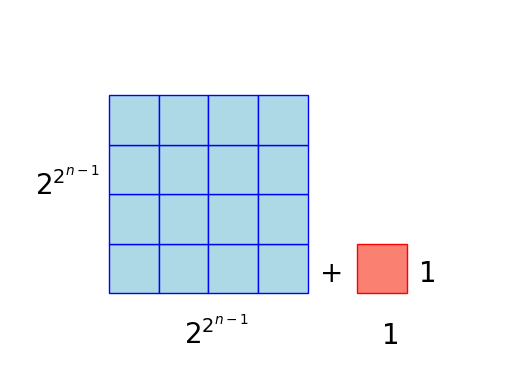

In [60]:
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable = 'datalim' )
ax.axis('off')

plt.xlim(-2,8)
plt.ylim(0,4)

for i in range(0,4):
    for j in range(0,4):
        rect = patches.Rectangle( (i, j), 1, 1, fc='lightblue', ec='blue' )
        ax.add_patch( rect )

ax.annotate( '+',(4.25,0.25), fontsize = 20 )
ax.annotate( '$2^{2^{n-1}}$',(-1.5,2), fontsize = 20 )
ax.annotate( '$2^{2^{n-1}}$',(1.5,-1), fontsize = 20 )
ax.annotate( '1',(5.5,-1), fontsize = 20 )
ax.annotate( '1',(6.25,0.25), fontsize = 20 )

rect = patches.Rectangle( (5, 0), 1, 1, fc='salmon', ec='red' )
ax.add_patch( rect )

fig

### Mersennovi brojevi

Brojevi oblika $2^p - 1$, gdje je $p$ prost, zovu se *Mersennovi brojevi*. Neki Mersennovi brojevi su prosti, a neki su složeni. Hipoteza je da Mersennovih brojeva koji su prosti ima beskonačno mnogo. Najveći poznati prosti Mersennov broj je $2^p - 1$, gdje je $p=43112609$. To je ujedno i najveći poznati prosti broj i sastoji se od 12978189 znamenaka.

### Belfegorov prosti broj

*Belfegorov broj* je palindromski prosti broj $ 1 000 000 000 000 066 600 000 000 000 001$ ($10^{30} + 666 * 10^{14} +1$). Vrlo je jednostavno zaključiti zašto se ovaj broj smatra zlim brojem te zato nosi ime jednog od Sedam Prinčeva Pakla. Broj se sastoji od 31 znamenke (obrnuto 13), 13 nula sa svake strane i jedinicom te broja 666 u sredini.<br>
Brojeve oblika $(10^{n+3} + 666)*10^{n+1} +1$ nazivamo *Befegorovi brojevi*. Većina Belfegorovih brojeva nisu prosti.

In [131]:
Image(filename='Belfegorov broj.png')

NameError: name 'Image' is not defined

## Literatura

https://repozitorij.pmf.unizg.hr/islandora/object/pmf%3A5409/datastream/PDF/view <br>
https://en.wikipedia.org/wiki/Prime_number<br>
https://en.wikipedia.org/wiki/Trial_division<br>
https://zir.nsk.hr/islandora/object/pmf%3A6350/datastream/PDF/view<br>
https://hr.wikipedia.org/wiki/Eratostenovo_sito<br>
https://repozitorij.pmf.unizg.hr/islandora/object/pmf%3A5409/datastream/PDF/view<br>
https://en.wikipedia.org/wiki/Pollard%27s_p_%E2%88%92_1_algorithm<br>
http://www.mathos.unios.hr/~mdjumic/uploads/diplomski/REN04.pdf<br>
http://www.mathos.unios.hr/kiss/Faktorizacija.pdf<br>
https://hr.wikipedia.org/wiki/Belfegorov_broj<br>
https://web.math.pmf.unizg.hr/~duje/utb/utblink.pdf<br>
https://primes.utm.edu/howmany.html?fbclid=IwAR3mM_6WtMULvWt4D-hTCjd0-HQt1VgaYhnPIfKM53u4PweqOr7r7a5JmrA<br>